In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [9]:
import seaborn as sns

In [13]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
df=pd.read_csv('datasetmultivariate.csv')

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
df

,InvDate,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
0,2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
1,2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2,2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
3,2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
4,2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656
...,...,...,...,...,...,...,...,...,...,...
1087,2021-12-27,6.4,5.2,7.6,1.4,144.0,14.4,31.5,993.4,2580
1088,2021-12-28,8.2,7.2,8.9,4.2,239.0,17.3,37.0,990.5,6190
1089,2021-12-29,8.6,6.4,11.7,1.8,218.0,18.5,40.8,1002.3,151808
1090,2021-12-30,12.9,10.7,14.0,0.2,226.0,27.7,50.0,1009.0,172952


In [6]:
df.shape

(1092, 10)

In [7]:
df.isnull().sum()

InvDate    0
tavg       0
tmin       0
tmax       0
prcp       0
wdir       0
wspd       0
wpgt       0
pres       0
InvQty     0
dtype: int64

<AxesSubplot:>

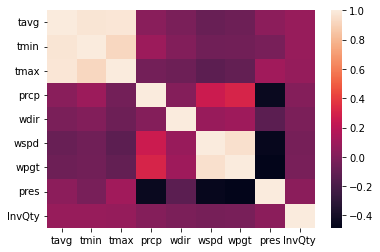

In [10]:
sns.heatmap(df.corr())

In [12]:
df.columns

Index(['InvDate', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt',
       'pres', 'InvQty'],
      dtype='object')

In [7]:
df.shape

(1092, 10)

In [38]:
df.set_index('InvDate', inplace=True)

In [19]:
df.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres',
       'InvQty'],
      dtype='object')

In [39]:
df.isnull().sum()

tavg      0
tmin      0
tmax      0
prcp      0
wdir      0
wspd      0
wpgt      0
pres      0
InvQty    0
dtype: int64

In [14]:
df.drop(['wdir', 'wspd', 'wpgt'],axis=1, inplace=True)

In [15]:
df.head()

,InvDate,tavg,tmin,tmax,prcp,pres,InvQty
0,2019-01-02,3.9,3.0,5.2,0.0,1041.9,271070
1,2019-01-03,2.4,0.1,4.2,0.0,1042.8,323298
2,2019-01-04,1.1,-1.5,3.6,0.0,1040.5,391404
3,2019-01-05,2.5,1.1,4.3,0.0,1037.2,248758
4,2019-01-06,4.2,1.9,6.5,0.0,1035.5,28656


In [16]:
df.columns

Index(['InvDate', 'tavg', 'tmin', 'tmax', 'prcp', 'pres', 'InvQty'], dtype='object')

In [17]:
from statsmodels.tsa.stattools import adfuller
fuller_test = adfuller(df['InvQty'])
fuller_test

(-4.581501646390804,
 0.00013969943332299233,
 22,
 1069,
 {'1%': -3.4364819663568262,
  '5%': -2.864247479652846,
  '10%': -2.568211560046239},
 28561.197716883373)

In [28]:
from statsmodels.tsa.stattools import adfuller
fuller_test = adfuller(df['tmax'])
fuller_test

(-2.2352129776585543,
 0.1937142341753425,
 22,
 1069,
 {'1%': -3.4364819663568262,
  '5%': -2.864247479652846,
  '10%': -2.568211560046239},
 4549.271009423906)

In [18]:
def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Reject null hypothesis, data is stationary')
        else:
            print('Do not reject null hypothesis, data is not stationary')

In [21]:
test_p_value(df['tmin'])

P-value:  0.08728734620559425
Do not reject null hypothesis, data is not stationary


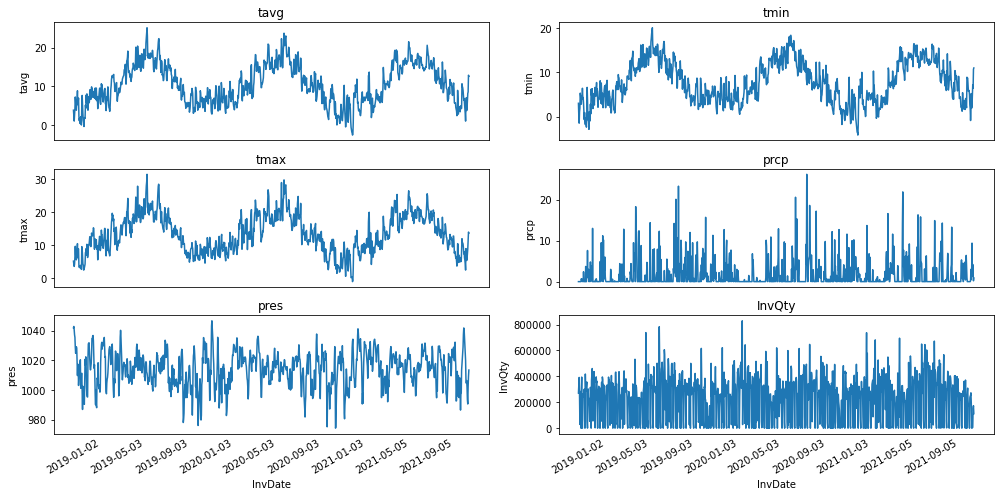

In [43]:
#ploting the charts to get insights about the aa
df_plot=df.copy()

list_length=df_plot.shape[1]
ncols=2
nrows=int(round(list_length/ncols,0))

fig, ax=plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14,7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
    ax=plt.subplot(nrows,ncols,i+1)
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.set_title(df_plot.columns[i])
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [45]:
# Indexing Batches
train_df = df.sort_values(by=['Date']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# Adding Month and Year in separate columns
# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
train_df['Year'] = d.strftime("%Y") 

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,tavg,tmin,tmax,prcp,pres,InvQty
0,3.9,3.0,5.2,0.0,1041.9,271070
1,2.4,0.1,4.2,0.0,1042.8,323298
2,1.1,-1.5,3.6,0.0,1040.5,391404
3,2.5,1.1,4.3,0.0,1037.2,248758
4,4.2,1.9,6.5,0.0,1035.5,28656


In [51]:
train_df.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'pres', 'InvQty'], dtype='object')

In [52]:
# List of considered Features
FEATURES = ['tavg', 'tmin', 'tmax', 'prcp', 'pres', 'InvQty'
            #, 'Month', 'Year', 'Adj Close'
    ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['InvQty']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['tavg', 'tmin', 'tmax', 'prcp', 'pres', 'InvQty']


,tavg,tmin,tmax,prcp,pres,InvQty,Prediction
1087,6.4,5.2,7.6,1.4,993.4,2580,2580
1088,8.2,7.2,8.9,4.2,990.5,6190,6190
1089,8.6,6.4,11.7,1.8,1002.3,151808,151808
1090,12.9,10.7,14.0,0.2,1009.0,172952,172952
1091,12.6,11.0,13.7,0.9,1013.4,111707,111707


In [53]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['InvQty'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(1092, 6)


In [54]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("InvQty")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(824, 50, 6) (824,)
(218, 50, 6) (218,)
0.4224314520752986
0.4224314520752986


In [57]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

300 50 6


In [58]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
52/52 [==============================] - 14s 204ms/step - loss: 0.0496 - val_loss: 0.0464
Epoch 2/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0411 - val_loss: 0.0457
Epoch 3/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0421 - val_loss: 0.0443
Epoch 4/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0397 - val_loss: 0.0439
Epoch 5/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0399 - val_loss: 0.0455
Epoch 6/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0386 - val_loss: 0.0465
Epoch 7/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0383 - val_loss: 0.0426
Epoch 8/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0388 - val_loss: 0.0443
Epoch 9/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0375 - val_loss: 0.0421
Epoch 10/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0371 - val_lo

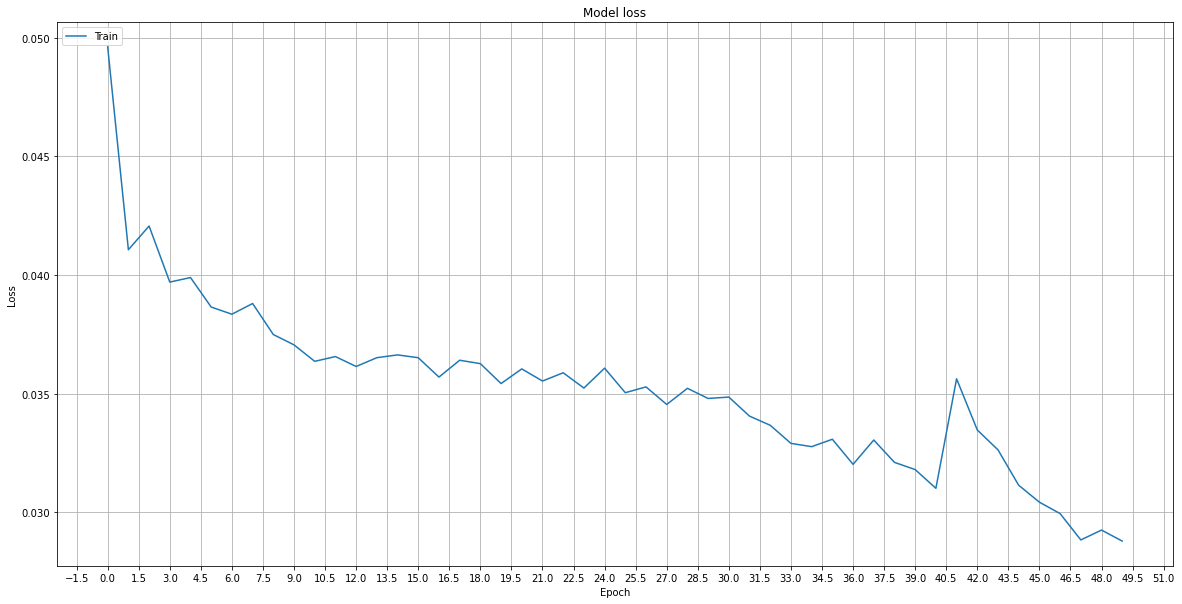

In [59]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [60]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 120510.61
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 31.46 %


C:\Users\mohan-prakashj\AppData\Local\Temp\ipykernel_14444\403865363.py:13: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
C:\Users\mohan-prakashj\AppData\Local\Temp\ipykernel_14444\403865363.py:17: RuntimeWarning: divide by zero encountered in true_divide
  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100


InvalidIndexError: (slice(None, None, None), None)

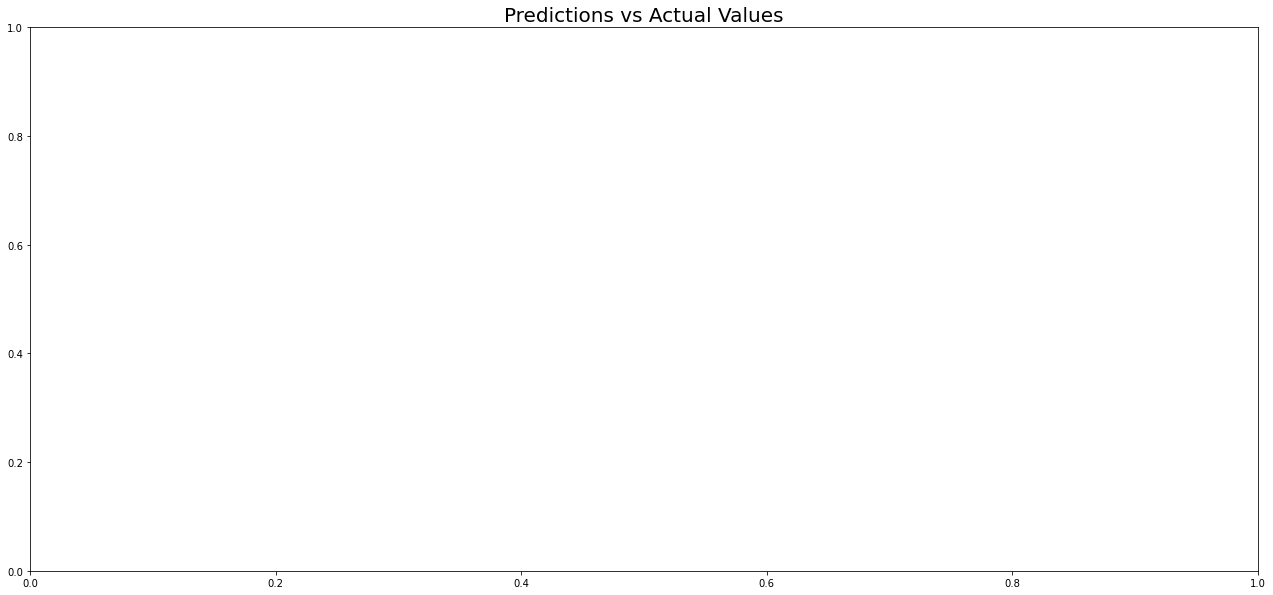

In [61]:
# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["InvQty"], True)


# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["InvQty"]]
xv = valid['Date']; yv = valid[["InvQty", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["InvQty"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

In [54]:
df_temp = df[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['InvQty'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for  at {today} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

The close price for  at 2022-03-31 was 111707
The predicted close price is 104310.3984375 (-7.09%)


In [53]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'


In [58]:
new_df['InvQty'].head()

InvDate
2021-11-12     33781
2021-11-13     30198
2021-11-14         0
2021-11-15    397725
2021-11-16    249386
Name: InvQty, dtype: int64

In [65]:
yv.tail()

,InvQty,Prediction
1087,2580,324635.687500
1088,6190,235295.515625
1089,151808,199598.890625
1090,172952,190318.906250
1091,111707,171422.718750


In [8]:
df.head()

,InvDate,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
0,2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
1,2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2,2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
3,2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
4,2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656


In [10]:
df.isnull().sum()

InvDate    0
tavg       0
tmin       0
tmax       0
prcp       0
wdir       0
wspd       0
wpgt       0
pres       0
InvQty     0
dtype: int64

In [11]:
df.set_index('InvDate', inplace=True)

In [12]:
df


,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
InvDate,,,,,,,,,
2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656
...,...,...,...,...,...,...,...,...,...
2021-12-27,6.4,5.2,7.6,1.4,144.0,14.4,31.5,993.4,2580
2021-12-28,8.2,7.2,8.9,4.2,239.0,17.3,37.0,990.5,6190
2021-12-29,8.6,6.4,11.7,1.8,218.0,18.5,40.8,1002.3,151808


In [13]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = df
values = dataset.values


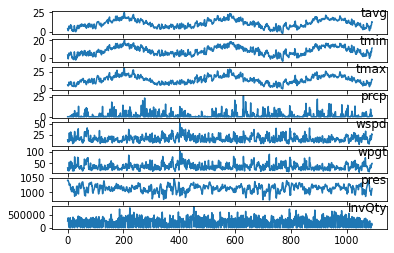

In [14]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7,8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [15]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [21]:
# integer encode direction
encoder = LabelEncoder()
values[:,8] = encoder.fit_transform(values[:,8])

In [22]:
# ensure all data is float
values = values.astype('float32')

In [23]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [24]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [27]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var8(t),var9(t)
1,0.231884,0.296296,0.190769,0.0,0.935933,0.219409,0.208333,0.935083,0.427505,0.947515,0.615139
2,0.177536,0.176955,0.160000,0.0,0.860724,0.132911,0.083333,0.947515,0.615139,0.915746,0.802772
3,0.130435,0.111111,0.141538,0.0,0.788301,0.187764,0.145270,0.915746,0.802772,0.870165,0.348614
4,0.181159,0.218107,0.163077,0.0,0.821727,0.223629,0.186937,0.870165,0.348614,0.846685,0.078891
5,0.242754,0.251029,0.230769,0.0,0.760446,0.120253,0.061937,0.846685,0.078891,0.758286,0.323028


In [26]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [28]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [29]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [30]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(365, 1, 10) (365,) (726, 1, 10) (726,)


In [31]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [32]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
6/6 - 2s - loss: 0.3958 - val_loss: 0.3835 - 2s/epoch - 331ms/step
Epoch 2/50
6/6 - 0s - loss: 0.3564 - val_loss: 0.3506 - 38ms/epoch - 6ms/step
Epoch 3/50
6/6 - 0s - loss: 0.3268 - val_loss: 0.3239 - 41ms/epoch - 7ms/step
Epoch 4/50
6/6 - 0s - loss: 0.3040 - val_loss: 0.3062 - 48ms/epoch - 8ms/step
Epoch 5/50
6/6 - 0s - loss: 0.2891 - val_loss: 0.2974 - 37ms/epoch - 6ms/step
Epoch 6/50
6/6 - 0s - loss: 0.2794 - val_loss: 0.2923 - 40ms/epoch - 7ms/step
Epoch 7/50
6/6 - 0s - loss: 0.2737 - val_loss: 0.2894 - 39ms/epoch - 7ms/step
Epoch 8/50
6/6 - 0s - loss: 0.2701 - val_loss: 0.2877 - 41ms/epoch - 7ms/step
Epoch 9/50
6/6 - 0s - loss: 0.2680 - val_loss: 0.2866 - 33ms/epoch - 5ms/step
Epoch 10/50
6/6 - 0s - loss: 0.2668 - val_loss: 0.2861 - 39ms/epoch - 6ms/step
Epoch 11/50
6/6 - 0s - loss: 0.2660 - val_loss: 0.2859 - 41ms/epoch - 7ms/step
Epoch 12/50
6/6 - 0s - loss: 0.2656 - val_loss: 0.2859 - 38ms/epoch - 6ms/step
Epoch 13/50
6/6 - 0s - loss: 0.2654 - val_loss: 0.2860 - 39ms

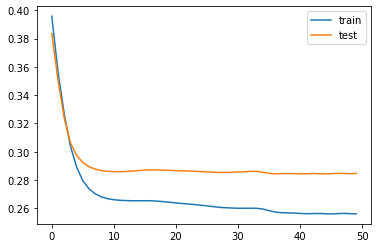

In [33]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [34]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [36]:
from numpy import concatenate

In [37]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

ValueError: operands could not be broadcast together with shapes (726,10) (9,) (726,10) 

In [38]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

ValueError: operands could not be broadcast together with shapes (726,10) (9,) (726,10) 

In [39]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

NameError: name 'sqrt' is not defined

In [41]:
df.head()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
InvDate,,,,,,,,,
2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656


In [43]:
df.shape

(1092, 9)

In [46]:
#new

In [49]:
df.head()

,InvDate,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
0,2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
1,2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2,2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
3,2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
4,2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656


In [48]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
import darts

In [51]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [58]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df1=df.to_numpy()

In [56]:
df1

array([['2019-01-02', 3.9, 3.0, ..., 31.5, 1041.9, 271070],
       ['2019-01-03', 2.4, 0.1, ..., 20.4, 1042.8, 323298],
       ['2019-01-04', 1.1, -1.5, ..., 25.9, 1040.5, 391404],
       ...,
       ['2021-12-29', 8.6, 6.4, ..., 40.8, 1002.3, 151808],
       ['2021-12-30', 12.9, 10.7, ..., 50.0, 1009.0, 172952],
       ['2021-12-31', 12.6, 11.0, ..., 50.0, 1013.4, 111707]],
      dtype=object)

In [62]:
df

,InvDate,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,InvQty
0,2019-01-02,3.9,3.0,5.2,0.0,336.0,14.1,31.5,1041.9,271070
1,2019-01-03,2.4,0.1,4.2,0.0,309.0,10.0,20.4,1042.8,323298
2,2019-01-04,1.1,-1.5,3.6,0.0,283.0,12.6,25.9,1040.5,391404
3,2019-01-05,2.5,1.1,4.3,0.0,295.0,14.3,29.6,1037.2,248758
4,2019-01-06,4.2,1.9,6.5,0.0,273.0,9.4,18.5,1035.5,28656
...,...,...,...,...,...,...,...,...,...,...
1087,2021-12-27,6.4,5.2,7.6,1.4,144.0,14.4,31.5,993.4,2580
1088,2021-12-28,8.2,7.2,8.9,4.2,239.0,17.3,37.0,990.5,6190
1089,2021-12-29,8.6,6.4,11.7,1.8,218.0,18.5,40.8,1002.3,151808
1090,2021-12-30,12.9,10.7,14.0,0.2,226.0,27.7,50.0,1009.0,172952


In [73]:
series=df[['InvDate','InvQty']].copy()

In [77]:
series.describe()

,InvQty
count,1092.000000
mean,239628.767399
std,167014.667189
min,0.000000
25%,54179.500000
50%,268381.000000
75%,350646.000000
max,828435.000000


In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [80]:
series=df

In [85]:
# Import libraries
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# Generate a sample dataset with correlated variables
df = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    df.append(row)
# fit model
model = VAR(df)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[100.64965765 101.12172323]]


In [86]:
# Import libraries
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Generate a sample dataset with correlated variables
df = list()
for i in range(100):
    v1 = i+ random()
    v2 = v1 + random()
    row = [v1, v2]
    df.append(row)
# fit VMA model by setting the ‘p’ parameter as 0.
model = VARMAX(df, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

[[72.20887389 73.08020331]]


In [87]:
# Import libraries
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Generate a sample dataset with correlated variables
df = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    df.append(row)
# fit model
model = VARMAX(df, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

[[0.53227012 1.08054911]]


In [89]:
# Import libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# Generate a sample dataset with independent exogenous variable

# fit model
model = SARIMAX(df, exog=df, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(df), len(df), exog=[exog2])
print(yhat)

ValueError: SARIMAX models require univariate `endog`. Got shape (100, 2).